In [1]:
import keras
from book_charter.base_tensorflow.neural_net_base import image_resized, predictions, outputs
from pygments.styles.dracula import background

'''
    池化层,抽取某个特殊的特征。例如最大池化层滤波器中的最大值

    使用CNN进行MNIST识别
'''
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist
#(1)准备数据
#1.加载数据
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#2.数据清理,已经是标准数据无需清洗

#3.特征归一化
x_train, x_test = x_train / 255.0, x_test / 255.0

#(2)改用CNN模型

input_shape = (28,28,1)

#增加一维到最后面,代表色彩通道,单色为1,RGB色系则设为3.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

#CNN模型，cnn不用指定使用哪种滤波器,tensorflow会自动配置,指定滤波器的个数即可
'''
    卷积层输出的宽度/高度
        W_out - (W-F+2P)/S + 1
        W_out为输出的宽度;W为原图像的宽度;F为滤波器的宽度;P为单边补0的列数;S为滑动的步数。
    第一层Conv2D输出宽度为 (28-3 + 2 *0)/1 +1 = 26
    第一层Conv2D输出参数数量:
        Output Filter数量 * (Filter 宽 * Filter 高 * Input Filter数量 + 1) = 32 * (3 * 3 * 1+ 1)= 320
         其中+ 1为回归线的偏差项
    第一层MaxPooling2D输出宽度(W_out): W_out = floor((W-F)/S + 1) = (26-2)/2 + 1 = 13
    第二层Conv2D的输出宽度 (13 -3 + 2 * 0)/1 + 1 = 11
    第二层输出参数数量 64 * ( 3 * 3 * 32 + 1) = 18496
'''
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=input_shape),
    #使用32个卷积核,卷积核大小为3*3.
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    #使用2*2的池化核付特征图进行下采样,保留最大值减少计算量
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    #使用64个卷积核,卷积核大小为3*3,进一步提取更复杂的特征
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    #使用2*2的池化核付特征图进行下采样,保留最大值减少计算量
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    #将多维特征展平为一维向量,以便输入全连接层
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

#(3)模型训练
'''
    可以使用model.summary()函数,观察输出维度及参数个数

'''
##设定优化器,损失函数和效果衡量指标
model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

##模型训练
history = model.fit(x_train, y_train, epochs=5,validation_split=0.2)

##评分
score = model.evaluate(x_test, y_test, verbose=0)

# for i,x in enumerate(score):
#     print(f'{model.metrics_names[i]}:{score[i]:.4f}')

model.summary()

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8450 - loss: 0.4976 - val_accuracy: 0.9775 - val_loss: 0.0782
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9685 - loss: 0.1040 - val_accuracy: 0.9796 - val_loss: 0.0667
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9767 - loss: 0.0745 - val_accuracy: 0.9858 - val_loss: 0.0472
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9809 - loss: 0.0629 - val_accuracy: 0.9863 - val_loss: 0.0464
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9825 - loss: 0.0555 - val_accuracy: 0.9883 - val_loss: 0.0398


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

In [1]:
'''
    比较单色与彩色的图像辨识准确率
'''
'''
    单色的图像辨识
'''
import tensorflow as tf

cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

#训练/测试数据的X/y维度
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

#转成单色
x_train = tf.image.rgb_to_grayscale(x_train)
x_test = tf.image.rgb_to_grayscale(x_test)

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(32,32,1)),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer=tf._optimizers.Adam(),loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

model.fit(x_train,y_train,epochs=5,validation_split=0.2)
score = model.evaluate(x_test,y_test,verbose=0)
for i,x in enumerate(score):
    print(f'{model.metrics_names[i]}:{score[i]:.4f}')


 42909696/170498071 ━━━━━━━━━━━━━━━━━━━━ 2:38:07 74us/step

Exception: URL fetch failure on https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz: None -- retrieval incomplete: got only 42903899 out of 170498071 bytes

In [1]:
'''
    影响数据增补: 在数据搜集困难时,可以将一张正常图像转成有各式缺陷的图像,例如增加旋转、便宜、拉近/拉远、亮度等效果,再将这些数据当作训练数据,这样训练出来的模型,就比较能识别有缺陷的图像。
    Tensorflow/Keras提供的数据增补函数ImageDataGenerator的参数有多元。
    width_shift_range: 图像宽度偏移的点(Pixel)数或比例
    height_shift_range: 图像高度偏移的点(Pixel)数或比例
    brightness_range: 图像亮度偏移的范围
    shear_range:图像顺时针歪斜的范围
    zoom_range: 图像拉近/拉远的比例
    fill_mode: 图像填满的方式,有consant、nearest、reflect、wrap
    horizontal_flip: 图像水平翻转
    vertical_flip: 图像垂直翻转
'''
import tensorflow as tf

cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

#训练/测试数据的X/y维度
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

#转成单色
x_train = tf.image.rgb_to_grayscale(x_train)
x_test = tf.image.rgb_to_grayscale(x_test)

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(32,32,1)),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer=tf._optimizers.Adam(),loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

###############################先进行数据增补###############################
batch_size = 1000
epochs = 5

##数据增补定义
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, #特征缩放
    rotation_range=10, #旋转10度
    zoom_range = 0.1, #拉远/拉近10%
    width_shift_range=0.1, #宽度偏移10%
    height_shift_range=0.1, #高度偏移10%
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='constant',
    cval=0
)

## 增补数据,并训练
datagen.fit(x_train)
history = model.fit(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                    validation_data=datagen.flow(x_test,y_test,batch_size=batch_size),verbose=2,
                    steps_per_epoch=x_train.shape[0]//batch_size)



 14360576/170498071 ━━━━━━━━━━━━━━━━━━━━ 3:43:00 86us/step

Exception: URL fetch failure on https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz: None -- retrieval incomplete: got only 14359899 out of 170498071 bytes

In [ ]:
'''
    使用增补的数据训练完成后,测试模型识别手写的数字
'''
from skimage import io
from skimage.transform import resize
import numpy as np

#读取图片并转为单色
upload_img = io.imread('../base_tensorflow/digit_image/1.png', as_gray=True)

#缩放为(28,28)大小的影像
image_resized = resize(upload_img,(28,28),anti_aliasing=True)
X1 = image_resized.reshape(1,28,28,1)

#反转颜色,颜色0为白色,与RGB颜色不同,它的0为黑色
X1 = np.abs(1-X1)

##预测
predictions = np.argmax(model.predict(X1),axis=-1)
print(f'识别结果为:{predictions}')


In [3]:

###################################宠物数据案例#############################
'''
    加载数据 ---> 过滤不合格数据  ---> 建立数据集  ---> 定义数据增补   ---> 建立模型  ----> 以增补数据训练模型
    ---> 测试
    微软的猫和狗数据集: https://www.microsoft.com/en-us/download/details.aspx?id=54765
'''
import os
import zipfile
import tensorflow as tf
import keras
from keras import layers, Sequential


#1. 下载解压缩文件
# zip_file_path = "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip"
zip_file_path = "E:/develop/python-workspace/kagglecatsanddogs_5340.zip"
#zip文件存放路径
zip_file = os.path.join('../base_tensorflow/',zip_file_path.split('/')[-1])

##如果文件不存在,则下载
if not os.path.exists(zip_file):
    #需要替换成网络地址
    tf.keras.utils.get_file(
        os.path.join(zip_file),
        zip_file_path,
        archive_format="auto"
     )

## 解压
unzip_path = os.path.join(os.getcwd(),'CatAndDog')
if not os.path.exists(unzip_path):
    with zipfile.ZipFile(zip_file,'r') as zip_ref:
        zip_ref.extractall(unzip_path)

## 2.过滤不合格的文件
#记录删除的文件个数
num_skipped = 0
for folder_name in("Cat","Dog"):
    folder_path = os.path.join(unzip_path,"PetImages",folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path,fname)
        try:
            fobj = open(fpath,'rb')
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()
        if not is_jfif:
            num_skipped += 1
            #删除文件
            os.remove(fpath)

print(f'删除了{num_skipped}个文件')

# 3.以文件目录为基础,建立训练(Training)以及验证(Validation)数据集
image_size = (180,180)
batch_size = 32 #批量

##训练数据集
### image_dataset_from_directory从目录中读取数据存入dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(unzip_path,"PetImages"),
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)

## 验证数据集
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(unzip_path,"PetImages"),
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size
)

# 4.数据增补
data_augmentation = keras.Sequential([
    # layers.RandomFlip("horizontal"), #水平翻转
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),  #旋转0.1比例
])

# 5.设定prefetch,预先读取训练数据,以提升效果
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

# 6.建立模型
def make_model(input_shape,num_classes):
    inputs = keras.Input(shape=input_shape)
    x = data_augmentation(inputs)
    #特征缩放
    x = layers.Rescaling(1./255)(x)
    x = layers.Conv2D(32,3,strides=2,padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64,3,padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x
    for size in [128,256,512,728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size,3,padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size,3,padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3,strides=2,padding="same")(x)

        residual = layers.Conv2D(size,1,strides=2,padding="same")(previous_block_activation)
        x = layers.add([x,residual])
        previous_block_activation = x

    x = layers.SeparableConv2D(1024,3,padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units,activation=activation)(x)
    return keras.Model(inputs,outputs)

##建立模型
model = make_model(input_shape=image_size+(3,),num_classes=2)

# 7.训练模型(标记只有两种cat/dog,使用binary_crossentropy损失函数)
ecpochs = 5

##设定模型配置
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),loss="binary_crossentropy",metrics=["accuracy"])
##模型训练
model.fit(train_ds,epochs=ecpochs,validation_data=val_ds)

# 8.模型验证(从目录中任意取一张图)
img = keras.preprocessing.image.load_img(
    "../base_tensorflow/CatAndDog/PetImages/Cat/6779.jpg",
    target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img) #将图片转为阵列
img_array = tf.expand_dims(img_array,0) #增加一维在最前面,代表一个数据

predictions = model.predict(img_array)
score = predictions[0][0]
print(f'{100*score} %的概率是猫,{100*(1-score)} %的概率是狗')

删除了0个文件
Found 15808 files belonging to 2 classes.
Using 12647 files for training.
Found 15808 files belonging to 2 classes.
Using 3161 files for validation.
Epoch 1/5
254/396 ━━━━━━━━━━━━━━━━━━━━ 9:58 4s/step - accuracy: 0.7144 - loss: 0.6148 

KeyboardInterrupt: 

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

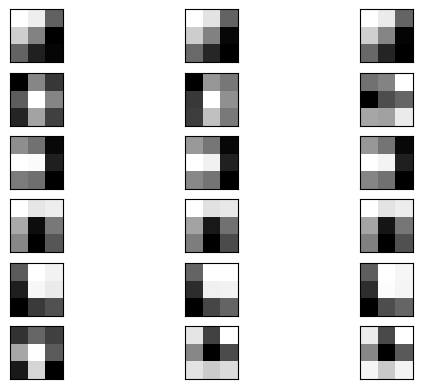

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


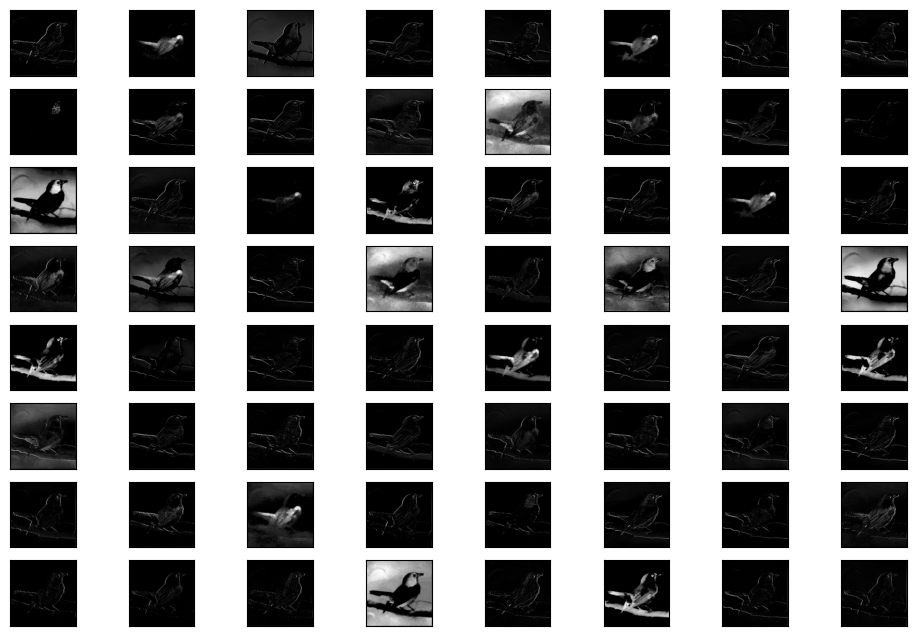

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
第1开始处理!


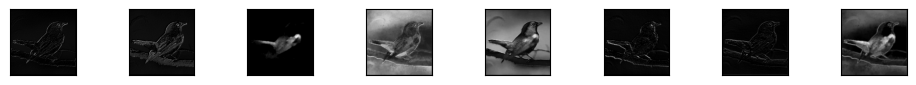

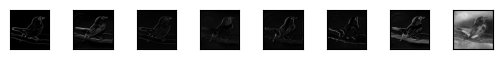

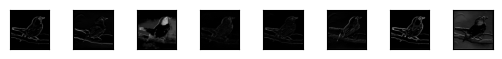

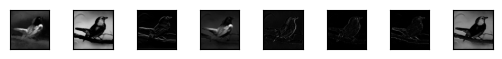

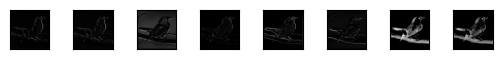

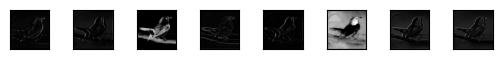

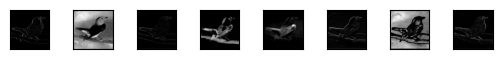

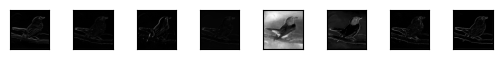

第1开始处理!


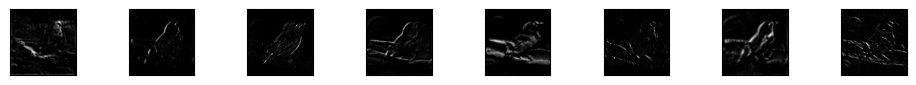

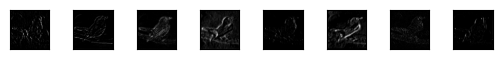

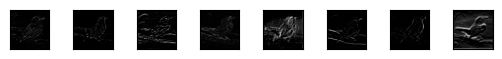

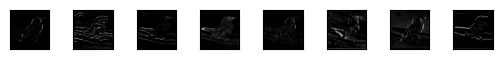

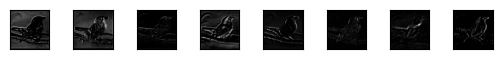

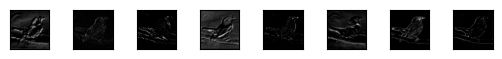

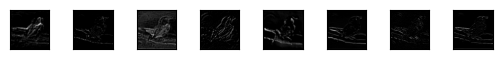

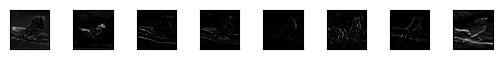

第1开始处理!


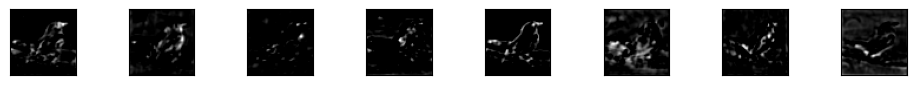

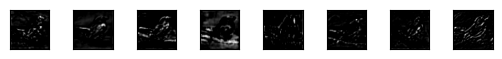

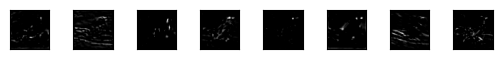

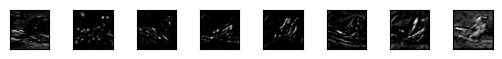

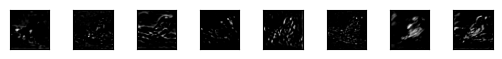

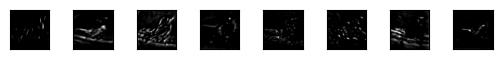

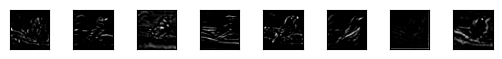

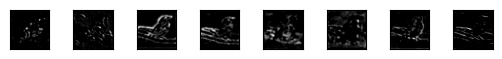

第1开始处理!


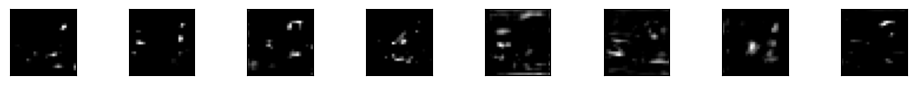

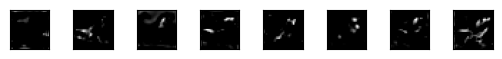

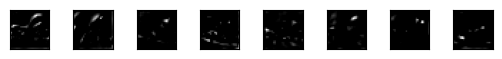

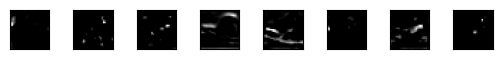

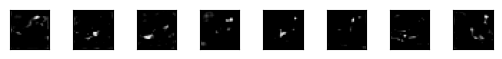

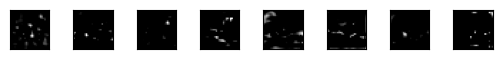

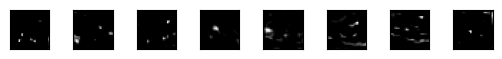

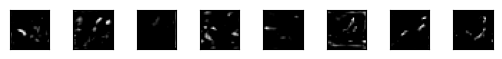

第1开始处理!


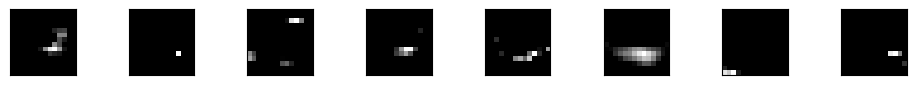

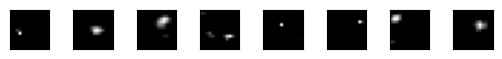

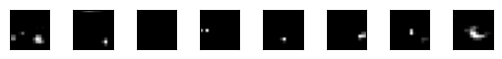

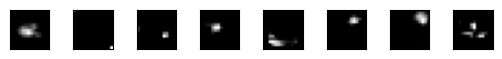

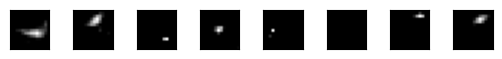

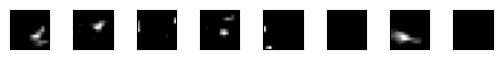

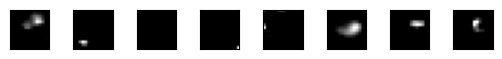

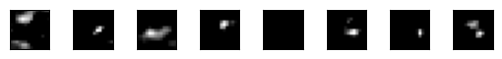

In [12]:
'''
    重建卷积层处理后的影像,观察线条特征。经过多次的卷积层、池化层处理,观察图像的变化

    1.加载VGG16模型 ---> 2.定义可视化滤波器函数  --->3.重建卷积层的输出函数
'''
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 1.加载VGG16模型
vgg16_model = tf.keras.applications.VGG16(weights="imagenet",include_top=False)
vgg16_model.summary()

# 2.定义可视化滤波器函数
def Visualize(layer_no=1, n_filter=6):
    ##获取权重
    filters,biases = vgg16_model.layers[layer_no].get_weights()
    ##正态化
    f_min,f_max = filters.min(),filters.max()
    filters = (filters-f_min)/(f_max-f_min)

    ##绘制特征图
    ix = 1
    for i in range(n_filter):  #遍历滤波器个数
        f = filters[:,:,:,i]    #取得每一个特征图
        for j in range(3):  #每列3张图
            ax = plt.subplot(n_filter,3,ix) #指定子窗口
            ax.set_xticks([])   #无x轴刻度
            ax.set_yticks([])   #无y轴刻度
            plt.imshow(f[:,:,j],cmap="gray") #绘制灰阶图
            ix += 1
    plt.show()

# 3.可视化第一层的滤波器
Visualize(1)
# Visualize(15)

# 4.重建第一个卷积层的输出图像
model2 = tf.keras.models.Model(inputs=vgg16_model.inputs,outputs=vgg16_model.layers[1].output)

## 加载测试的图像
img = tf.keras.preprocessing.image.load_img("./bird/bird1.png",target_size=(224,224))
img_array = tf.keras.preprocessing.image.img_to_array(img) #将图片转为阵列
img_array = tf.expand_dims(img_array,axis=0) # 增加一维在最前面,代表一个数据
img = tf.keras.applications.vgg16.preprocess_input(img_array) #正态化

## 预测
feature_maps = model2.predict(img)

## 将结果以8*8的窗口显示
square = 8
ix = 1
plt.figure(figsize=(12,square))
for _ in range(square):
    for _ in range(square):
        ax = plt.subplot(square,square,ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0,:,:,ix-1],cmap="gray")
        ix += 1
plt.show()

print("====================================")
# 5.重建2,5,9,13,17多层卷积层的输出图像
ixs = [2,5,9,13,17]
outputs = [vgg16_model.layers[i].output for i in ixs]
model3 = tf.keras.models.Model(inputs=vgg16_model.inputs,outputs=outputs)

## 加载测试的图像
img = tf.keras.preprocessing.image.load_img("./bird/bird1.png",target_size=(224,224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array,axis=0)
img = tf.keras.applications.vgg16.preprocess_input(img_array)

##预测
feature_maps = model3.predict(img)

## 将结果以8*8窗口显示
square = 8
for fmap in feature_maps:
    ix = 1
    plt.figure(figsize=(12,square))
    for _ in range(square):
        for _ in range(square):
            ax = plt.subplot(square,square,ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(fmap[0,:,:,ix-1],cmap="gray")
            ix += 1
        plt.show()

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8369 - loss: 0.5087 - val_accuracy: 0.9781 - val_loss: 0.0784
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9716 - loss: 0.0926 - val_accuracy: 0.9852 - val_loss: 0.0527
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9786 - loss: 0.0705 - val_accuracy: 0.9857 - val_loss: 0.0480
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9806 - loss: 0.0627 - val_accuracy: 0.9877 - val_loss: 0.0408
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9836 - loss: 0.0533 - val_accuracy: 0.9888 - val_loss: 0.0405
loss:0.0351
compile_metrics:0.9881


E:\develop\anaconda3\envs\d2l_tensorflow\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
E:\develop\anaconda3\envs\d2l_tensorflow\Lib\site-packages\shap\explainers\_deep\deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
E:\develop\anaconda3\envs\d2l_tensorflow\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(100, 28, 28, 1))']
  warnings.warn(msg)
E:\develop\anaconda3\envs\d2l_tensorflow\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.


E:\develop\anaconda3\envs\d2l_tensorflow\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(1, 28, 28, 1))']
  warnings.warn(msg)


(1, 28, 28, 1, 10)


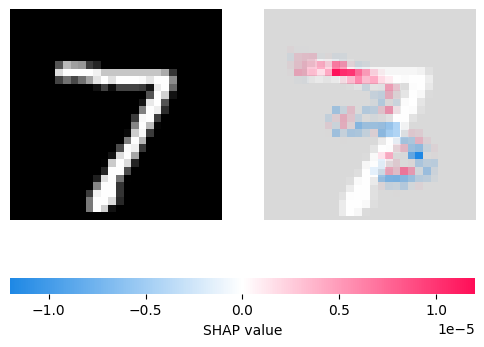

In [1]:
'''
    Shap库用于观察图像的哪些位置对于辨识最有帮助,还有LIME库
    pip install shap

    加载数据 ---> 定义CNN模型 --> 模型训练 --> 计算Shapley Values -->绘制测试数据特征归因
    数据集使用mnist
'''
import tensorflow as tf
import numpy as np
from keras import layers

# 加载数据
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
x_train_norm,x_test_norm = x_train/255.0,x_test/255.0

# 定义CNN模型
input_shape = (28,28,1)
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=input_shape),
    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10,activation="softmax")
])


# 设定优化器
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# 模型训练
history = model.fit(x_train_norm,y_train,epochs=5,validation_split=0.2)

# 评分
score = model.evaluate(x_test_norm,y_test,verbose=0)

for i,x in enumerate(score):
    print(f"{model.metrics_names[i]}:{score[i]:.4f}")


# Shapley Values计算: 测试第一批数据
import shap
background = x_train[np.random.choice(x_train_norm.shape[0],100,replace=False)]
e = shap.DeepExplainer(model,background)

## 测试第一批
shape_values = e.shap_values(x_test_norm[:1])
shape_values

print(np.array(shape_values).shape)
##绘制5批测试数据的特征归因,红色的区块代表贡献率较大的区域
shap.image_plot(shape_values,x_test_norm[:1])